In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


In [2]:
df=pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')

In [3]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [7]:
df.drop(columns=['customer_id'],inplace=True)

In [8]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df=pd.get_dummies(df,columns=['country','gender'],drop_first=True)
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [10]:
X=df.drop(columns=["churn"])
y=df['churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [11]:
X_train

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
8486,738,40,6,114940.67,2,1,1,194895.57,1,0,0
708,580,35,8,0.00,2,0,1,10357.03,0,0,0
7569,656,28,8,120047.77,1,1,1,137173.39,0,1,1
6799,760,38,6,162888.73,1,1,0,91098.76,0,0,1
8623,430,38,8,153058.64,1,1,0,99377.27,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3895,673,25,3,108244.82,2,1,1,103573.96,1,0,0
3052,607,35,2,0.00,2,1,1,114190.30,0,0,1
1527,661,35,8,124098.54,1,1,0,86678.48,1,0,1
2668,524,52,2,87894.26,1,1,0,173899.42,0,0,1


In [12]:
y_train

8486    1
708     0
7569    0
6799    1
8623    0
       ..
3895    0
3052    0
1527    0
2668    1
9527    1
Name: churn, Length: 8000, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler 
Scaler = StandardScaler()
X_trained_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [14]:
X_trained_scaled

array([[ 0.90487394,  0.10598613,  0.3398744 , ...,  1.72629647,
        -0.57850497, -1.10442556],
       [-0.73744098, -0.37358914,  1.03349562, ..., -0.57927478,
        -0.57850497, -1.10442556],
       [ 0.05253329, -1.04499451,  1.03349562, ..., -0.57927478,
         1.72859362,  0.90544807],
       ...,
       [ 0.10450528, -0.37358914,  1.03349562, ...,  1.72629647,
        -0.57850497,  0.90544807],
       [-1.31952728,  1.25696678, -1.04736805, ..., -0.57927478,
        -0.57850497,  0.90544807],
       [ 2.06904655,  0.10598613,  1.38030624, ..., -0.57927478,
        -0.57850497, -1.10442556]])

In [15]:
X_test_scaled

array([[ 0.09411088, -0.56541924, -1.04736805, ..., -0.57927478,
         1.72859362,  0.90544807],
       [ 0.05253329,  0.77739151, -1.39417866, ..., -0.57927478,
         1.72859362,  0.90544807],
       [ 1.28946668,  2.98343776,  0.3398744 , ...,  1.72629647,
        -0.57850497,  0.90544807],
       ...,
       [ 1.09197311, -1.90823   , -0.35374682, ..., -0.57927478,
         1.72859362,  0.90544807],
       [-1.64175362, -0.27767408, -1.04736805, ..., -0.57927478,
        -0.57850497, -1.10442556],
       [ 1.7572146 ,  0.01007108, -1.39417866, ..., -0.57927478,
        -0.57850497, -1.10442556]])

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

There are 2 types of models in keras Sequential or Non-Sequential

In [17]:
# #Create a sequential model
# model=Sequential()
# #Add a hidden layer with 3 units and sigmoid activation function, expecting input of dimension 11
# model.add(Dense(3,activation='sigmoid',input_dim=11))
# #Add an output layer with 1 unit and sigmoid activation function
# model.add(Dense(1,activation='sigmoid'))

Increase layers

In [18]:
#Create a sequential model
model=Sequential()
#Add a hidden layer with 11 units and relu activation function, expecting input of dimension 11
model.add(Dense(11,activation='relu',input_dim=11))
#Add a hidden layer with 11 units
model.add(Dense(11,activation='relu'))
#Add an output layer with 1 unit and sigmoid activation function
model.add(Dense(1,activation='sigmoid'))

In [19]:
#Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [20]:
# #Compile the model with binary crossentropy loss and Adam optimizer
# model.compile(loss='binary_crossentropy',optimizer='Adam')

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
#Train the model using the scaled training data (X_trained_scaled) and training labels (y_train) for 100 epochs
#taking validation data of 20% from train dataset for varification purpose
history=model.fit(X_trained_scaled,y_train,epochs=100,validation_split=0.2)


Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5008 - accuracy: 0.7934 - val_loss: 0.4590 - val_accuracy: 0.7981
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.8003 - val_loss: 0.4373 - val_accuracy: 0.8175
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.8155 - val_loss: 0.4266 - val_accuracy: 0.8219
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8228 - val_loss: 0.4200 - val_accuracy: 0.8319
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8281 - val_loss: 0.4130 - val_accuracy: 0.8344
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8323 - val_loss: 0.4095 - val_accuracy: 0.8338
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8320 - val_loss: 0.4048 - val_accuracy: 0.8344

In [23]:
#Get the weights of the first hidden layer
first_hidden_layer_weights = model.layers[0].get_weights()

#Get the weights of the second hidden layer
second_hidden_layer_weights = model.layers[1].get_weights()

#Get the weights of the output layer
output_layer_weights = model.layers[2].get_weights()

#Print the weights of the first hidden layer
print("Weights of the first hidden layer:")
print(first_hidden_layer_weights)

#Print the weights of the second hidden layer
print("Weights of the second hidden layer:")
print(second_hidden_layer_weights)

#Print the weights of the output layer
print("Weights of the output layer:")
print(output_layer_weights)

Weights of the first hidden layer:
[array([[-0.31771827,  0.05693025,  0.14128745,  0.13103332,  0.08128115,
        -0.05708225,  0.03747841,  0.21635538,  0.03080614,  0.1240482 ,
         0.25214356],
       [ 0.10235219,  0.26226974,  0.4138511 , -0.5535739 , -0.01153488,
         0.68273085, -0.03660091, -0.35328922, -0.11188293,  1.0954188 ,
        -0.753947  ],
       [ 0.04755627, -0.1314623 , -0.05569118,  0.29423106,  0.45534685,
         0.09719614,  0.0374262 , -0.3561573 ,  0.05547119,  0.07286398,
        -0.00523327],
       [ 0.67171186, -0.19955508, -0.38162982, -1.0180845 ,  0.10304186,
         0.606672  , -0.04593771,  0.08092262, -0.4691152 , -0.28592202,
         0.31768468],
       [-0.07307603, -1.5404036 ,  0.892223  , -0.14133494, -1.0082344 ,
         0.556143  , -0.22156198, -0.41111502, -0.44834197, -0.4411592 ,
        -0.44002765],
       [-0.05184348,  0.00991624, -0.0489622 , -0.34491977,  0.04459912,
        -0.06031877, -0.06341795,  0.20596516,  0.0

In [24]:
#do prediction for X_test
model.predict(X_test_scaled)
#we are not getting 0/1 because output is passed through sigmoid function which is giving probability in output

63/63 [==============================] - 0s 1ms/step


array([[0.13869084],
       [0.01399093],
       [0.02722451],
       ...,
       [0.01726415],
       [0.02442624],
       [0.2385169 ]], dtype=float32)

In [25]:
y_log=model.predict(X_test_scaled)
#if y_pred is greater than 0.5 then show output as 1 nor 0
y_pred=np.where(y_log>0.5,1,0)

63/63 [==============================] - 0s 1ms/step


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8525

In [27]:
history.history

{'loss': [0.5008275508880615,
  0.45151910185813904,
  0.4322141408920288,
  0.4209741950035095,
  0.41391631960868835,
  0.4087929129600525,
  0.4045911729335785,
  0.40115851163864136,
  0.39829516410827637,
  0.3951342701911926,
  0.3923497498035431,
  0.38992810249328613,
  0.3869999945163727,
  0.38366061449050903,
  0.3810173273086548,
  0.37733975052833557,
  0.37392958998680115,
  0.3706851303577423,
  0.3668042719364166,
  0.3625451922416687,
  0.3585818111896515,
  0.3545410633087158,
  0.3506583869457245,
  0.3474055230617523,
  0.3443755805492401,
  0.342720627784729,
  0.34016191959381104,
  0.3377993702888489,
  0.3367979824542999,
  0.3350805938243866,
  0.33475974202156067,
  0.3336762487888336,
  0.33269691467285156,
  0.33213579654693604,
  0.33129656314849854,
  0.33110833168029785,
  0.33051997423171997,
  0.3302273452281952,
  0.329635351896286,
  0.3289526104927063,
  0.3285519778728485,
  0.3287310302257538,
  0.3280722498893738,
  0.32820361852645874,
  0.327297

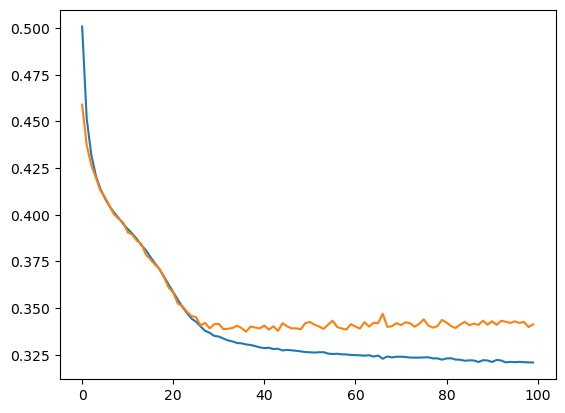

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 

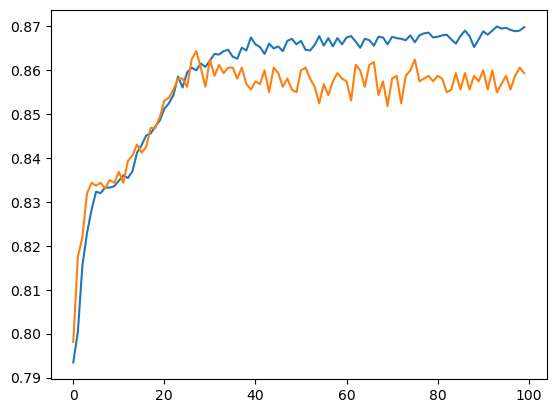

In [29]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 